# Here I will show the effects of removing the least significant bits

In [2]:
import numpy as np
import matplotlib.pyplot as plt

s = np.load('../test_data_sintef.npy')

# calculate min num bits we need to allocate to the original
bO = len(bin(np.max(np.abs(s)).astype(int))[2:])

This paper argues that we can remove the 3 least significant bits without any loss: </br>
https://www.mdpi.com/1424-8220/22/10/3676#B2-sensors-22-03676

## Remove 3 lowest bits

In [3]:
# Here I convert the signal to binary, remove the 3 first bits and convert it back
temp = s[:12000, :].astype(int)

p = 3

x = np.zeros_like(temp)
for i in range(temp.shape[1]):
    # Convert each element to binary string and remove the three lowest bits
    bin_arr = [np.binary_repr(abs(a), width=16)[:-p] for a in temp[:,i]]
    # Convert each binary string back to integer
    for b in range(len(bin_arr)):
        if(temp[b,i] < 0):
            x[b,i] = -int(bin_arr[b],2)
        else:
            x[b,i] = int(bin_arr[b],2)

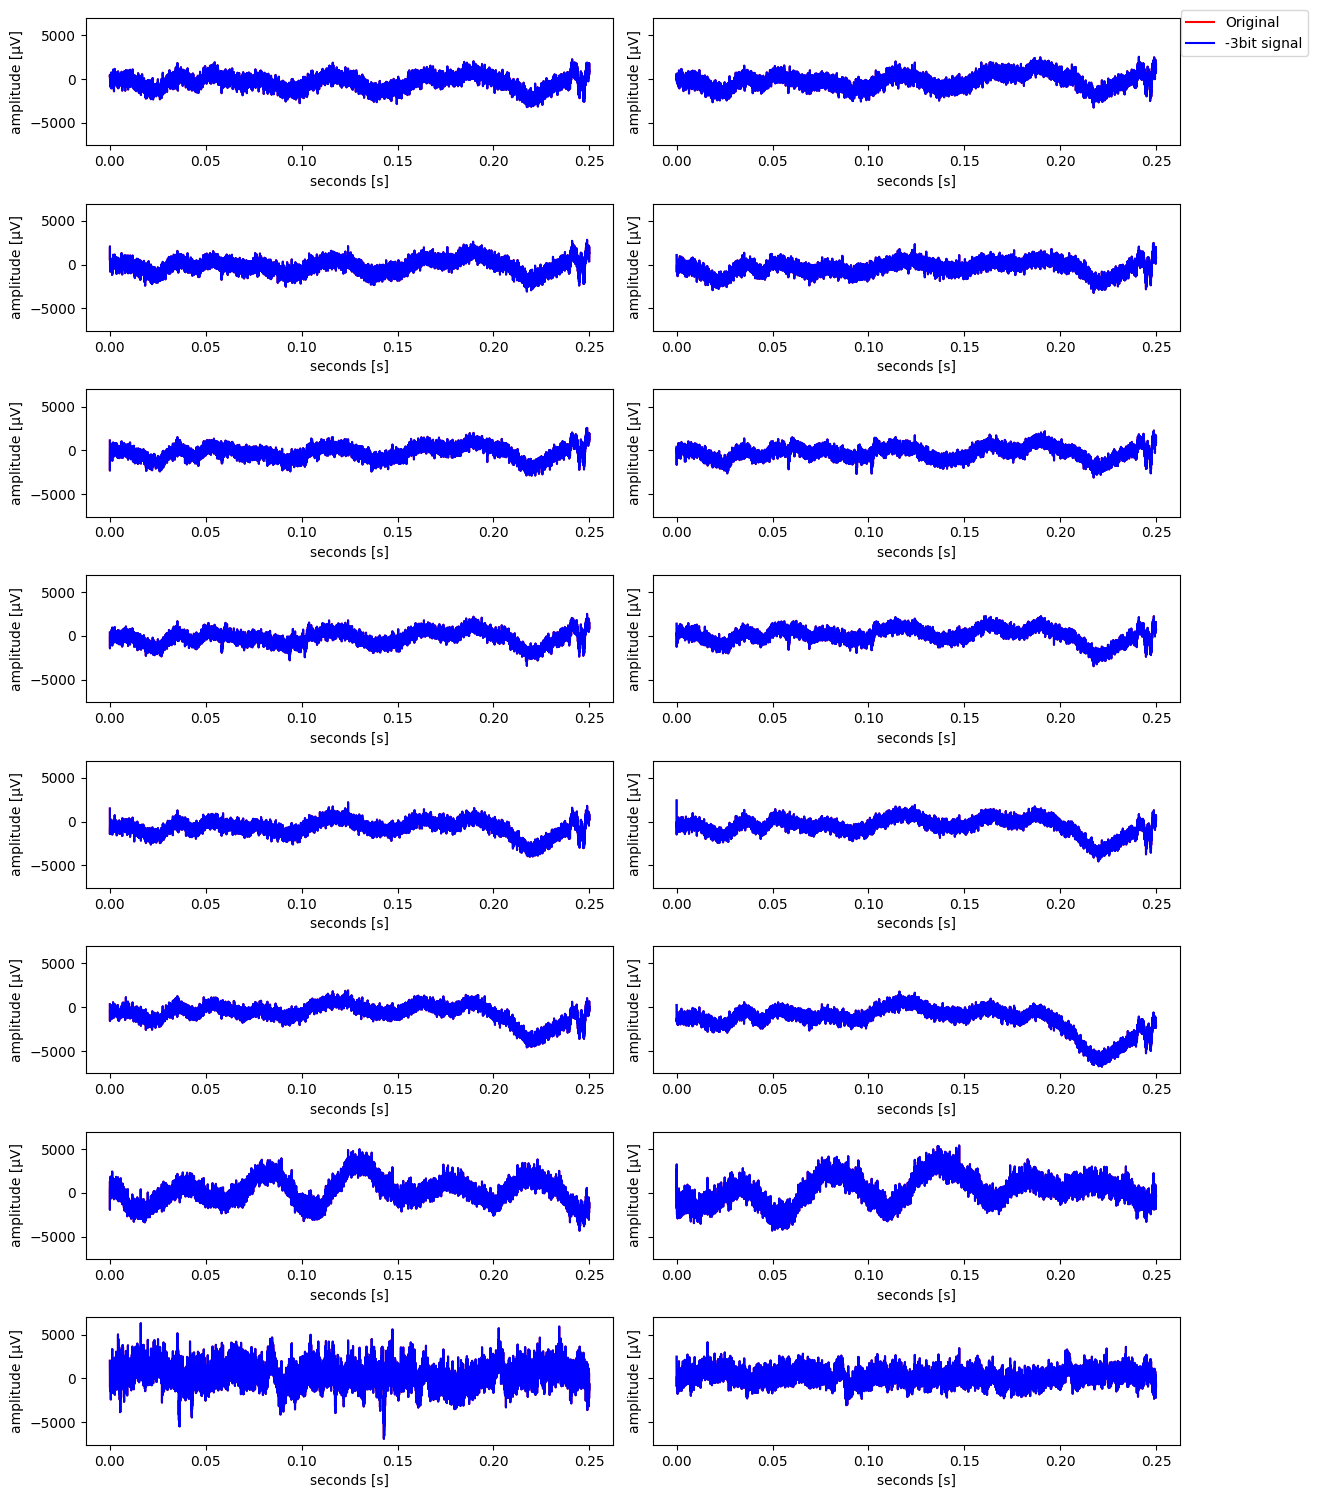

Mean error:  3.00, Mean signal value: 864.04
Max possible error value: 6
Index og max possible error: (12,11)


Text(0.5, 0.98, 'Biggest possible error when removing 3 lowest bits')

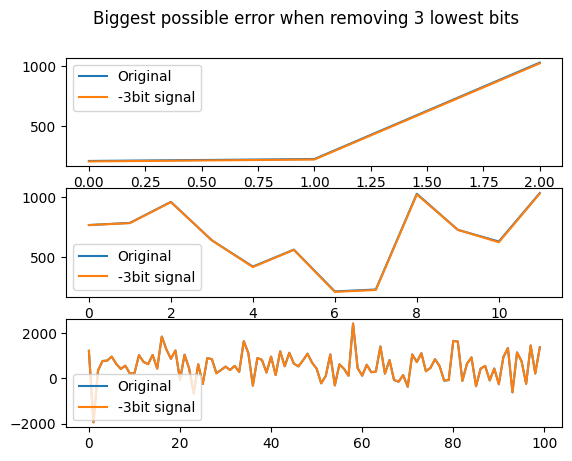

In [4]:
# Here I print and plot the error we get

time = 10*x.shape[0]/s.shape[0]
tx = np.linspace(0,time, int(x.shape[0])) # time 

# Visualize the whole signals with 3 bits less
fig, axs = plt.subplots(8, 2, figsize=(12, 15), sharey=True)
for i in range(x.shape[1]):
    axs.flatten()[i].plot(tx, temp[:,i], 'r')
    axs.flatten()[i].plot(tx, x[:,i]*2**p, 'b')
    axs.flatten()[i].set_xlabel('seconds [s]')
    axs.flatten()[i].set_ylabel('amplitude [µV]')
fig.legend(['Original', '-3bit signal'], loc='upper right', bbox_to_anchor=(1.1, 1))
plt.tight_layout() # adjust the spacing between subplots
plt.show() # show the plot

# print the maximal error we can get
print(f'Mean error:  {np.mean(abs(x*2**p - temp)):.2f}, Mean signal value: {np.mean(np.abs(temp)):.2f}')
print(f'Max possible error value: {np.max(abs(x*2**p - temp))}')
print(f'Index og max possible error: ({np.argmax(np.argmax(abs(x*2**p-temp), axis=0))},{np.max(np.argmax(abs(x*2**p-temp), axis=0))})')
              

# plot the maximal error we can get
fig2, axs2 = plt.subplots(3,1)
axs2[0].plot(temp[9:12,12])
axs2[0].plot(x[9:12,12]*2**p)
axs2[0].legend(['Original', '-3bit signal'])
axs2[1].plot(temp[3:15,12])
axs2[1].plot(x[3:15,12]*2**p)
axs2[1].legend(['Original', '-3bit signal'])
axs2[2].plot(temp[:100,12])
axs2[2].plot(x[:100,12]*2**p)
axs2[2].legend(['Original', '-3bit signal'])
fig2.suptitle('Biggest possible error when removing 3 lowest bits')


Text(0.5, 1.0, 'komprimert hjernesignal')

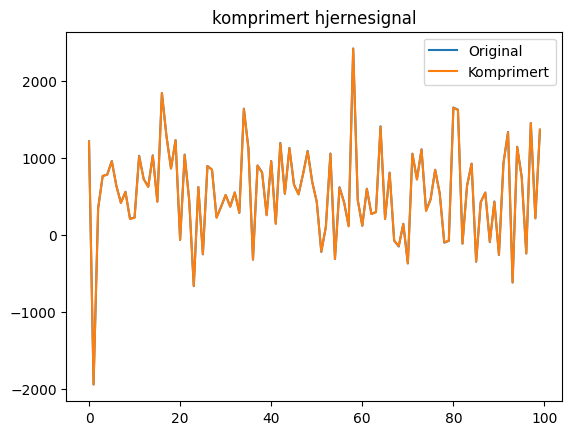

In [5]:
plt.figure()
plt.plot(temp[:100,12])
plt.plot(x[:100,12]*2**p)
plt.legend(['Original', 'Komprimert'])
plt.title('komprimert hjernesignal')

In [6]:
# Here I calculate the Signal to Noise and Distorion ration (SNDR) - common measure of error
SNDR = 0
for i in range(x.shape[1]):
    SNDR += 1/(x.shape[1]) * 20*np.log10(np.linalg.norm(temp[:,i])/np.linalg.norm(temp[:,i] - x[:,i]*2**p))
print(f'SNDR: {SNDR:.2f} dB')

SNDR: 49.07 dB
